In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score 
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here CustomerID column has the data of unique ID to the customers which can be dropped. similarly Name column can also be dropped and it will not affect our analysis and prediction in any way as well.

In [3]:
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


This dataset has the details of passengers in which both numerical and catagorical data are present. Here "Survived" is the target variable which has 2 categories so it will be a "Classification problem" where we need to predict if an arbitrary passenger on Titanic would survive the sinking or not using classification models.

In [5]:
df.shape

(891, 10)

This dataset has 11 cloumns where 1 is target variable which is 'Survived' and other 10 are features.

In [6]:
# checking data types of columns
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [8]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [9]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

We can see there are columns Age,Cabin and Embarked which have null values.So, we can simply replace it with their respective mean or mod values.

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [12]:
# Checking again for null values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Here we have dealth with null values.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [14]:
# summary of numerical columns
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can observe here that
1) The counts of all the columns are same which means there are no missing values in the dataset.

2) The mean value is greater than the median (50%) in SibSp, Parch, Survived and Fare columns which means the data is skewed to right in these column.

3) The data in the column Pclass has mean value less than median which means the data is skewed to left.

4) By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data.

0    549
1    342
Name: Survived, dtype: int64


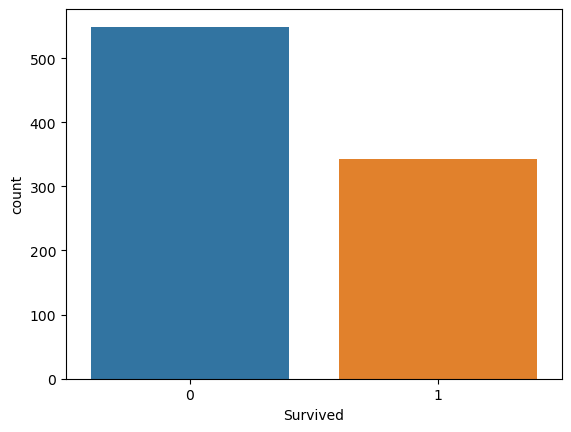

In [15]:
# visualizing the survived passengers
ax = sns.countplot(x='Survived', data=df)
print(df['Survived'].value_counts())

We can observe that people who have not survived are more than people who have survived.

male      577
female    314
Name: Sex, dtype: int64


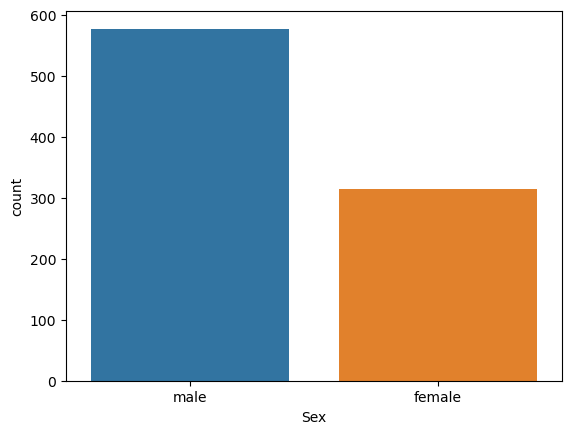

In [16]:
ax = sns.countplot(x='Sex', data=df)
print(df['Sex'].value_counts())

We can see here that total number of male are more than female.

3    491
1    216
2    184
Name: Pclass, dtype: int64


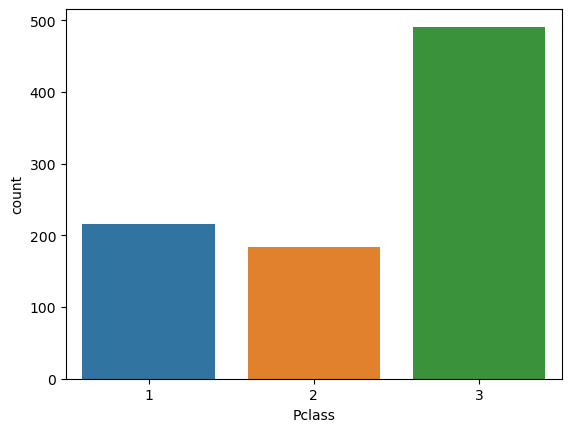

In [17]:
print(df['Pclass'].value_counts())
ax = sns.countplot(x='Pclass',data=df)
plt.show()

We can observe here that people who were sitting in class 3 are more than class 1 and class2.

S    646
C    168
Q     77
Name: Embarked, dtype: int64


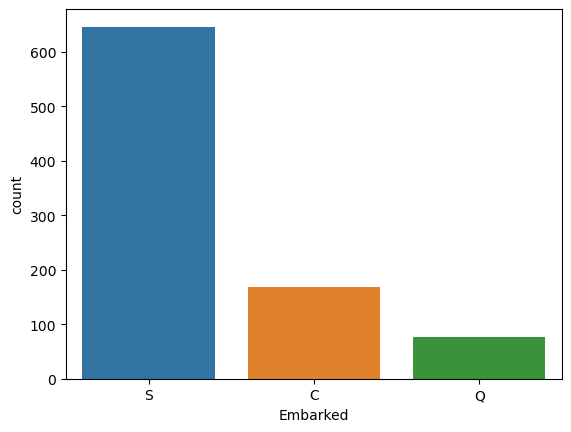

In [18]:
print(df['Embarked'].value_counts())
ax = sns.countplot(x='Embarked',data=df)
plt.show()

People who have embarked on Port of Embarkation S are quite high as compared to other C and Q(C = Cherbourg; Q = Queenstown; S = Southampton)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


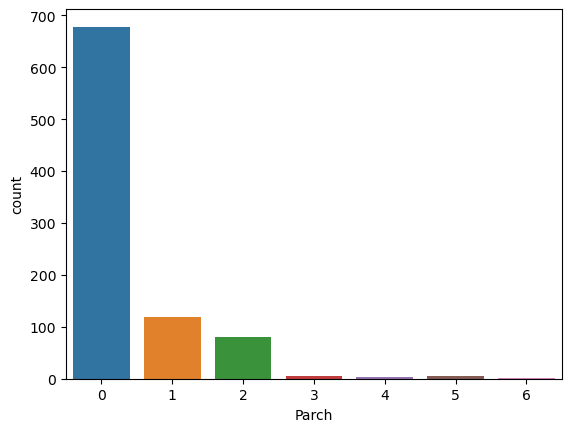

In [19]:
print(df['Parch'].value_counts())
ax = sns.countplot(x='Parch',data=df)
plt.show()

Most passengers were not with parents and children.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


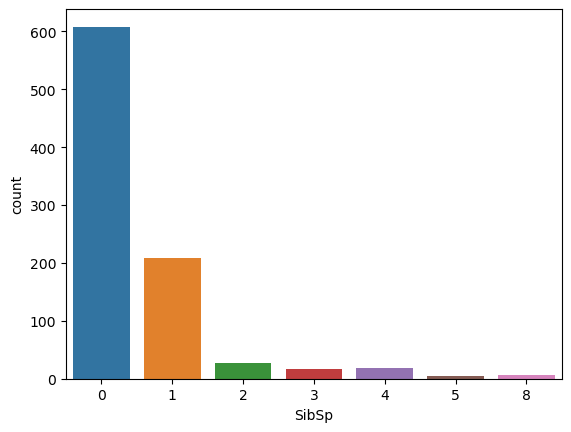

In [20]:
print(df['SibSp'].value_counts())
ax = sns.countplot(x='SibSp',data=df)
plt.show()

Most passengers did not aboard with Siblings or spouse.

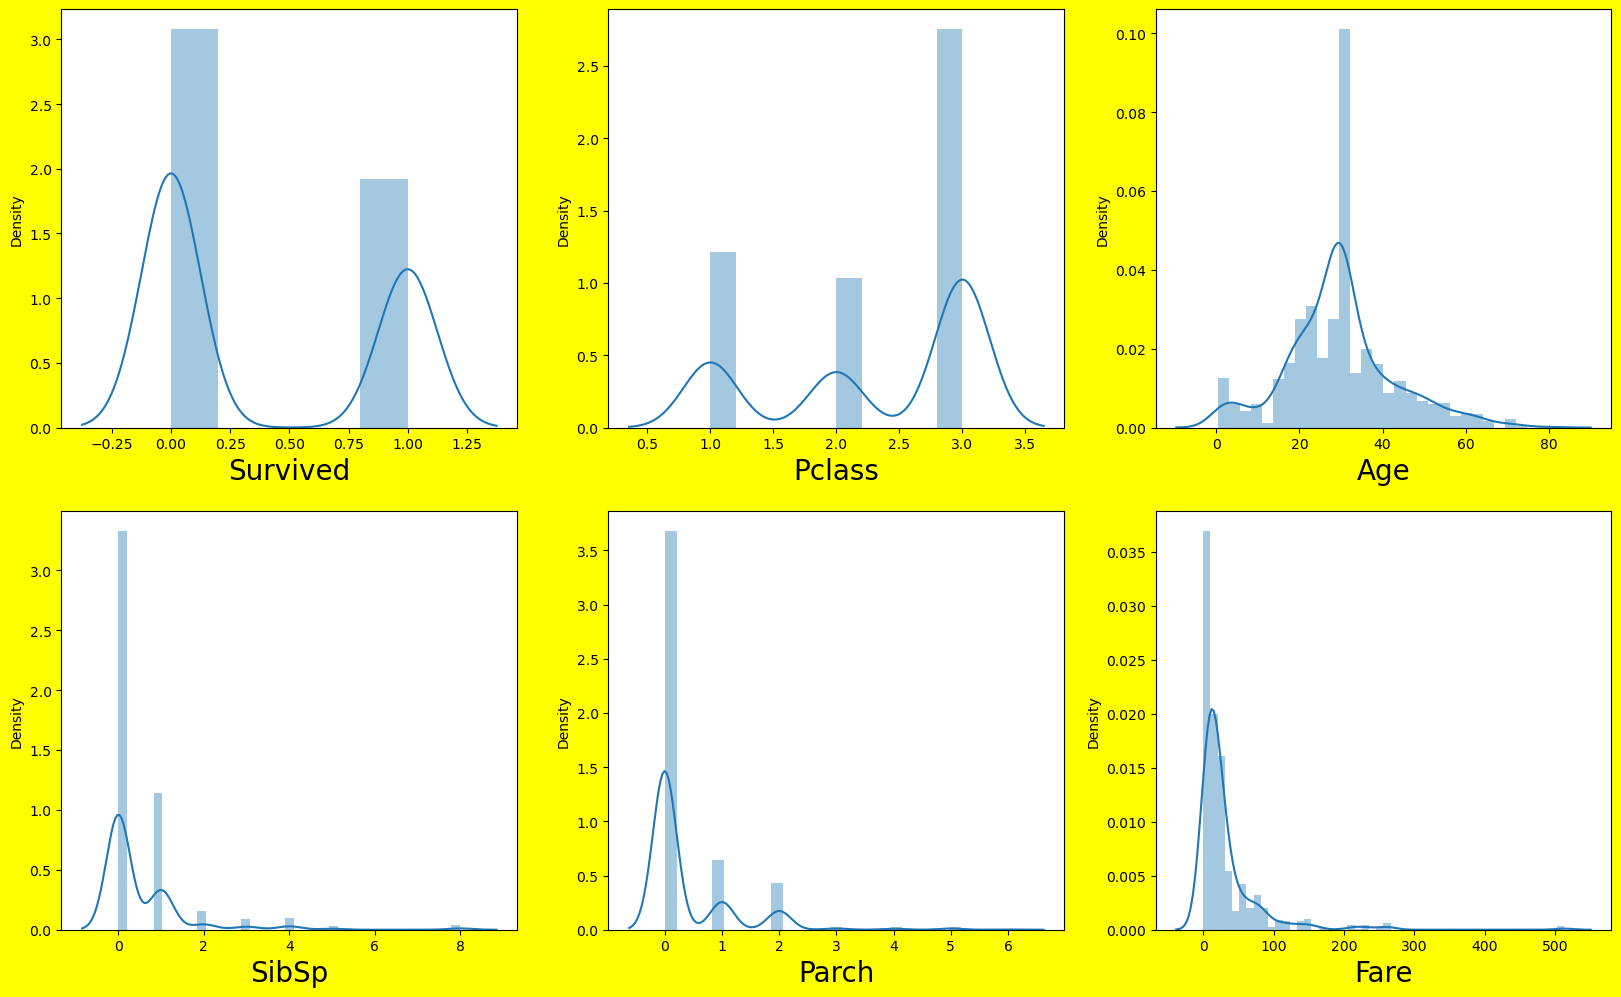

In [21]:
# Let's see how data is distributed for every column 
plt.figure(figsize=(20, 25), facecolor='yellow')
plotnumber = 1

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    if plotnumber <= 13:
        ax = plt.subplot(4, 3, plotnumber) 
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    
    plotnumber += 1

plt.show()

We can see there is some skewness in the data.

there are outliers present in some columns

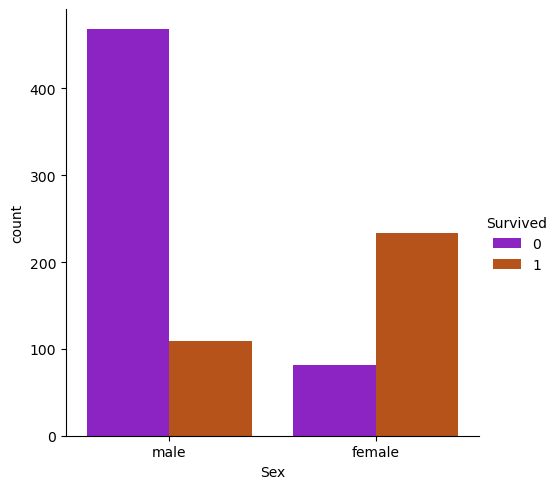

In [22]:
#Comparison between Sex and Survived
sns.catplot(x = 'Sex', hue ='Survived',palette= "gnuplot", kind ="count", data = df)
plt.show()

Clearly male passengers Survived more than female passengers.

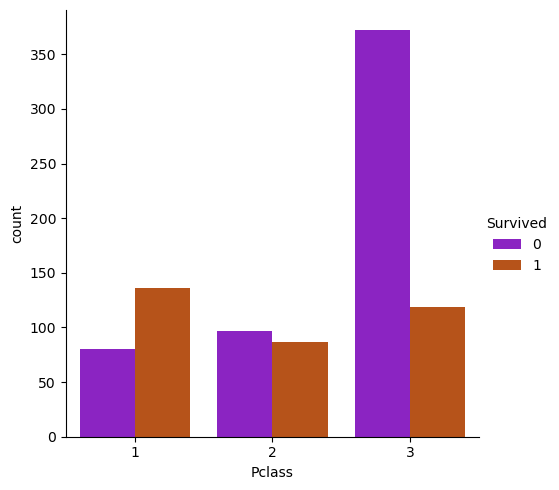

In [23]:
#Comparison between Sex and Survived
sns.catplot(x = 'Pclass', hue ='Survived',palette= "gnuplot", kind ="count", data = df)
plt.show()

Passengers from class 1 and 2 had less surviving ratio as compared to class 3.

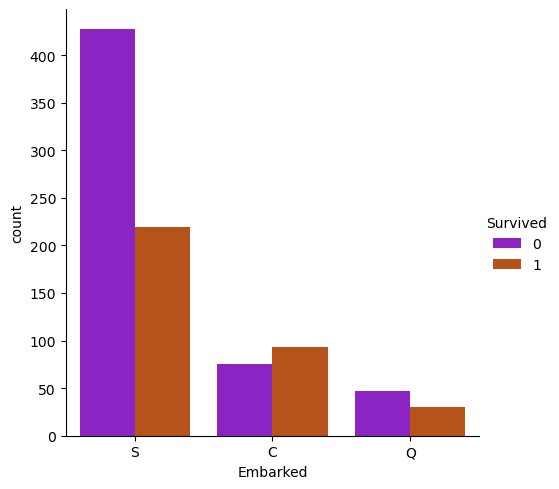

In [24]:
#Comparison between Sex and Survived
sns.catplot(x = 'Embarked', hue ='Survived',palette= "gnuplot", kind ="count", data = df)
plt.show()

Passengers who embarked on port Southampton have survived more than people who embarked on port Cherbourg and Queenstown.

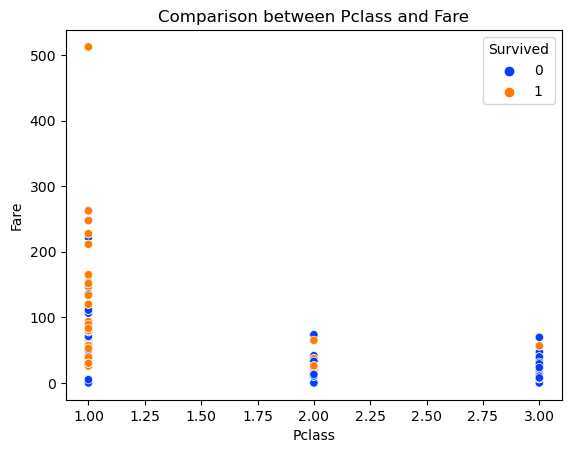

In [25]:
# Comparing Pclass and Fare
plt.title("Comparison between Pclass and Fare")
sns.scatterplot(x='Pclass', y='Fare', data=df, hue ='Survived', palette = 'bright')
plt.show()

we can observe that passengers who sat on Pclass and gave maximum fare had lesser chance of survival.

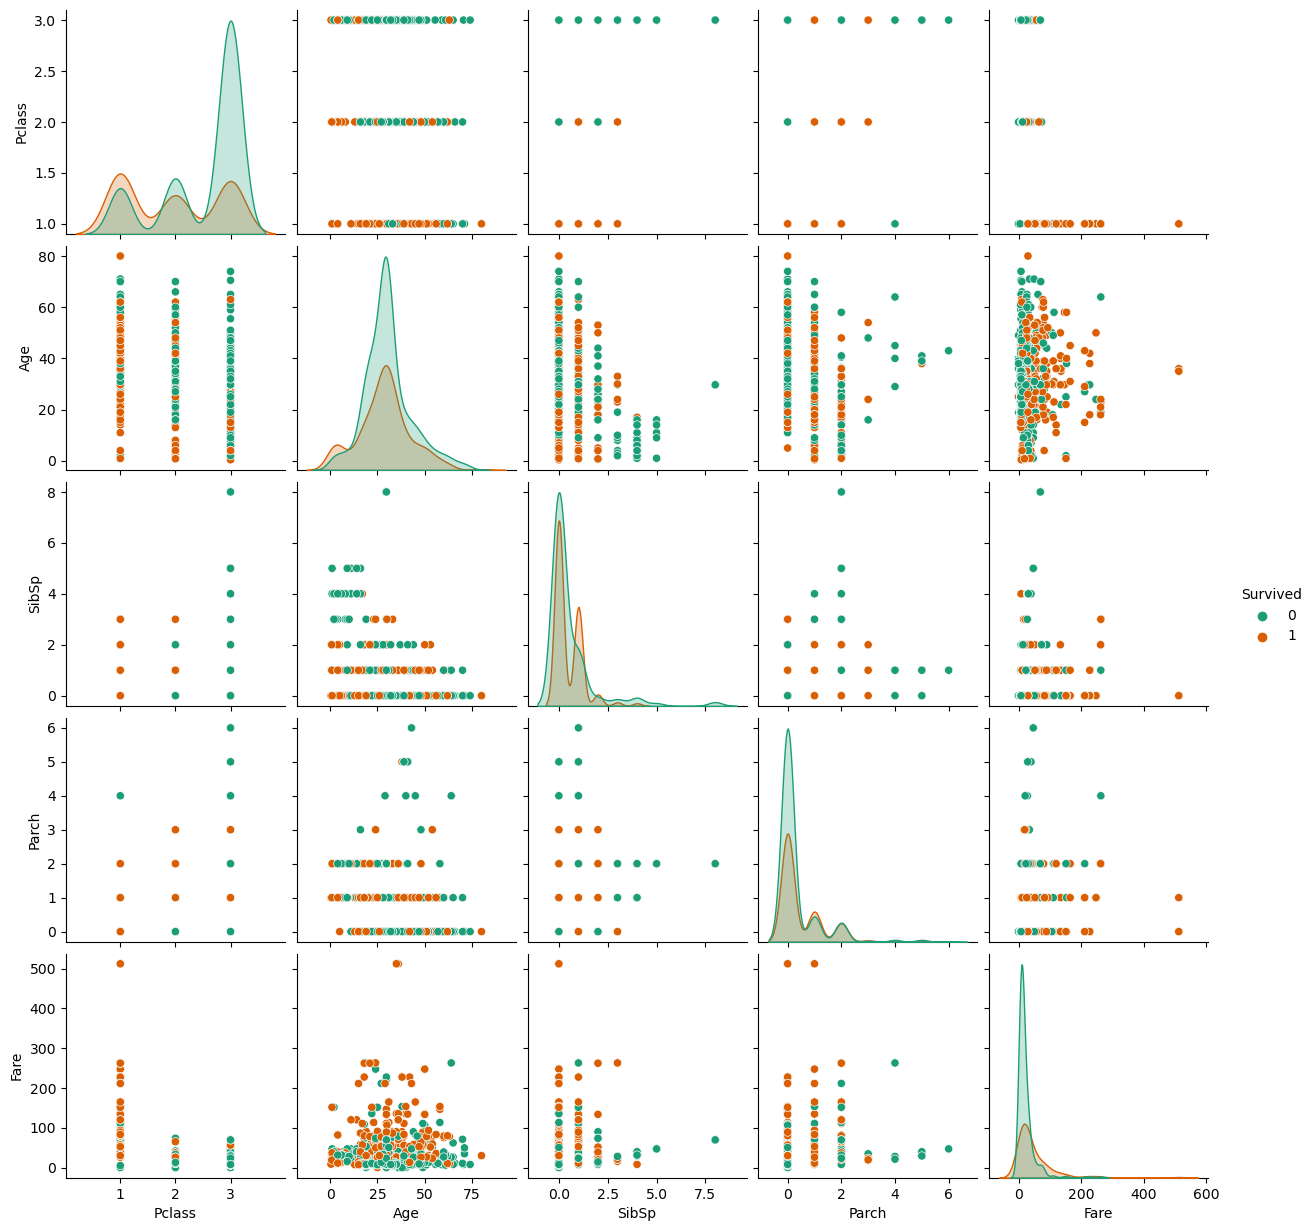

In [26]:
sns.pairplot(df,hue ='Survived',palette= "Dark2")
plt.show()

In [27]:
df_features= df.drop('Survived',axis=1)

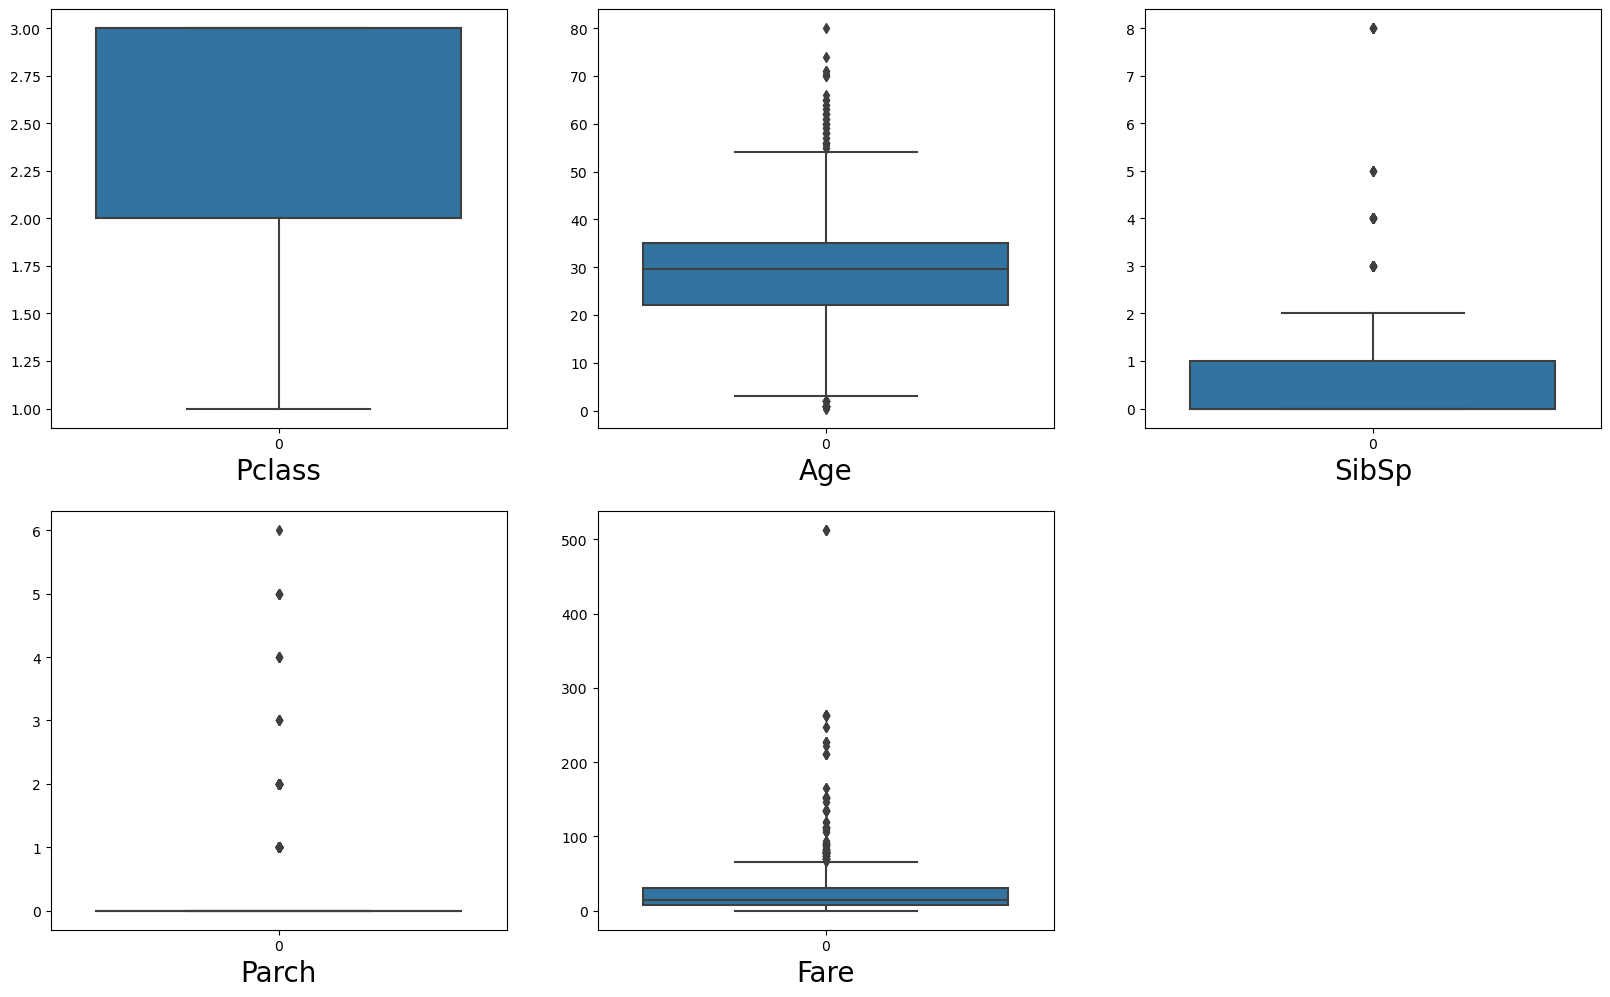

In [28]:
# Visualize the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

numerical_columns = df_features.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    if graph<=13:         
        plt.subplot (4,3,graph) 
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
    
    graph+=1
plt.show()

We can see there are outliers present in the data. So, we will remove them.

In [29]:
df.shape

(891, 10)

In [30]:
#1st quantile

q1= df.quantile (0.25)

#3rd quantile

q3= df.quantile (0.75)

#IQR

iqr= q3 -q1


In [31]:
q1

Survived     0.0000
Pclass       2.0000
Age         22.0000
SibSp        0.0000
Parch        0.0000
Fare         7.9104
Name: 0.25, dtype: float64

In [32]:
q1.Fare

7.9104

In [33]:
iqr.Fare

23.0896

In [34]:
lower_limit =q1.Fare - 1.5 * iqr.Fare
upper_limit = q3.Fare + 1.5 * iqr.Fare


In [35]:

# Removing outliers from column Fare
df = df[(df['Fare'] >= lower_limit) & (df['Fare'] <= upper_limit)]


In [36]:
df.shape

(775, 10)

In [37]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,male,35.000000,0,0,373450,8.0500,B96 B98,S
5,0,3,male,29.699118,0,0,330877,8.4583,B96 B98,Q


In [38]:
lower_limit =q1.Age - 1.5 * iqr.Age
upper_limit = q3.Age + 1.5 * iqr.Age

# Removing outliers from column Age
df = df[(df['Age'] >= lower_limit) & (df['Age'] <= upper_limit)]


In [39]:
df.shape

(721, 10)

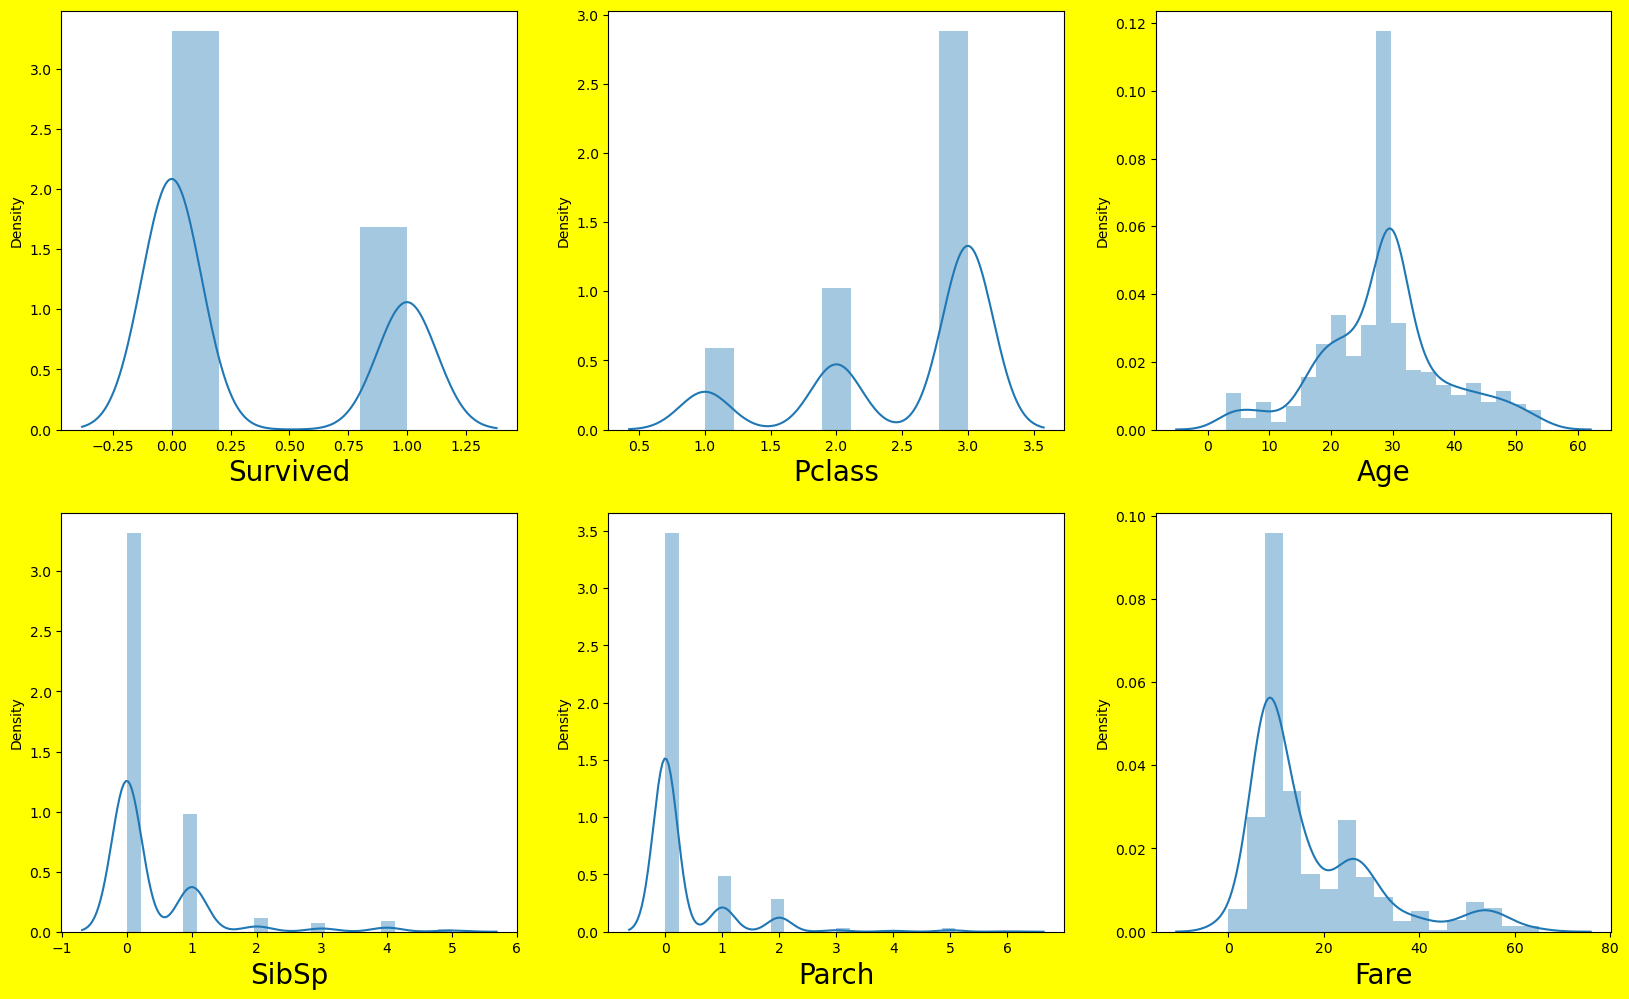

In [40]:
plt.figure(figsize=(20, 25), facecolor='yellow')
plotnumber = 1

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    if plotnumber <= 13:
        ax = plt.subplot(4, 3, plotnumber) 
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    
    plotnumber += 1

plt.show()

It looks better now we will check skewness.

In [41]:
df.skew() #range is -0.5 to 0.5

Survived    0.690965
Pclass     -1.108345
Age         0.015118
SibSp       2.877469
Parch       3.313740
Fare        1.519028
dtype: float64

The columns Pclass, SibSp, parch and Fare have skewness in the data. Since Pclass is categorical no need to remove skewness. Now we will use cube root mehtod to remove skewness.

In [42]:
#Removing skewness using cuberoot method
df['SibSp'] = np.cbrt(df['SibSp'])
df['Parch'] = np.cbrt(df['Parch'])

df['Fare'] = np.cbrt(df['Fare'])

In [43]:
df.skew()

Survived    0.690965
Pclass     -1.108345
Age         0.015118
SibSp       1.162529
Parch       1.675919
Fare       -0.279122
dtype: float64

In [44]:
df['SibSp'] = np.log1p(df['SibSp'])
df['Parch'] = np.log1p(df['Parch'])


In [45]:
df.skew()

Survived    0.690965
Pclass     -1.108345
Age         0.015118
SibSp       1.062378
Parch       1.591834
Fare       -0.279122
dtype: float64

In [46]:
from scipy.stats import boxcox

df['SibSp'], _ = boxcox(df['SibSp'] +1 )
    
df['Parch'], _ = boxcox(df['Parch'] +1)

In [47]:
df.skew()

Survived    0.690965
Pclass     -1.108345
Age         0.015118
SibSp       0.989372
Parch       1.527261
Fare       -0.279122
dtype: float64

In [48]:
df['SibSp'] = df['SibSp'] ** 2
df['Parch'] = df['Parch']** 2

In [49]:
df.skew()

Survived    0.690965
Pclass     -1.108345
Age         0.015118
SibSp       0.991239
Parch       1.527370
Fare       -0.279122
dtype: float64

In [50]:
df['SibSp'] = np.sqrt(df['SibSp'])


In [51]:
df.skew()

Survived    0.690965
Pclass     -1.108345
Age         0.015118
SibSp       0.989372
Parch       1.527370
Fare       -0.279122
dtype: float64

In [52]:
df['SibSp'] = np.exp(df['SibSp'])


In [53]:
df.skew()

Survived    0.690965
Pclass     -1.108345
Age         0.015118
SibSp       0.989487
Parch       1.527370
Fare       -0.279122
dtype: float64

We have removed skewness from the data.

In [54]:
# Encoding categorical columns using OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder 
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform (df[i].values.reshape(-1, 1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1.0,22.000000,1.187843,0.000000,468.0,1.935438,21.0,2.0
2,1,3,0.0,26.000000,1.000000,0.000000,589.0,1.993730,21.0,2.0
3,1,1,0.0,35.000000,1.187843,0.000000,34.0,3.758647,28.0,2.0
4,0,3,1.0,35.000000,1.000000,0.000000,420.0,2.004158,21.0,2.0
5,0,3,1.0,29.699118,1.000000,0.000000,235.0,2.037485,21.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.000000,1.000000,0.000000,68.0,2.351335,21.0,2.0
887,1,1,0.0,19.000000,1.000000,0.000000,10.0,3.107233,16.0,2.0
888,0,3,0.0,29.699118,1.187843,0.013196,595.0,2.862294,21.0,2.0
889,1,1,1.0,26.000000,1.000000,0.000000,4.0,3.107233,32.0,0.0


In [55]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,0.337032,2.509015,0.679612,28.476085,1.052713,0.002586,297.626907,2.424544,23.593620,1.610264
std,0.473024,0.717046,0.466950,10.043466,0.084854,0.005226,174.264728,0.665752,10.286853,0.727900
min,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,1.000000,0.000000,145.000000,1.991279,21.000000,2.000000
50%,0.000000,3.000000,1.000000,29.699118,1.000000,0.000000,293.000000,2.306785,21.000000,2.000000
75%,1.000000,3.000000,1.000000,33.000000,1.187843,0.000000,448.000000,2.962496,21.000000,2.000000
max,1.000000,3.000000,1.000000,54.000000,1.195040,0.013292,599.000000,4.020726,74.000000,2.000000


In [56]:
# checking the correlation between features and the target
cor = df.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.273088,-0.510246,-0.065202,0.091740,0.148238,-0.161520,0.265120,0.191739,-0.106064
Pclass,-0.273088,1.000000,0.048046,-0.293610,-0.016340,0.018626,0.394650,-0.484927,-0.262644,0.010733
Sex,-0.510246,0.048046,1.000000,0.095276,-0.216014,-0.303259,0.049853,-0.205950,-0.073406,0.077520
Age,-0.065202,-0.293610,0.095276,1.000000,-0.140774,-0.255589,-0.106317,0.049923,0.066165,0.034725
SibSp,0.091740,-0.016340,-0.216014,-0.140774,1.000000,0.433984,0.017936,0.431320,0.015331,0.006880
Parch,0.148238,0.018626,-0.303259,-0.255589,0.433984,1.000000,0.040837,0.385963,0.069609,-0.007572
Ticket,-0.161520,0.394650,0.049853,-0.106317,0.017936,0.040837,1.000000,-0.189574,-0.064806,0.074030
Fare,0.265120,-0.484927,-0.205950,0.049923,0.431320,0.385963,-0.189574,1.000000,0.198521,-0.048615
Cabin,0.191739,-0.262644,-0.073406,0.066165,0.015331,0.069609,-0.064806,0.198521,1.000000,0.073603
Embarked,-0.106064,0.010733,0.077520,0.034725,0.006880,-0.007572,0.074030,-0.048615,0.073603,1.000000


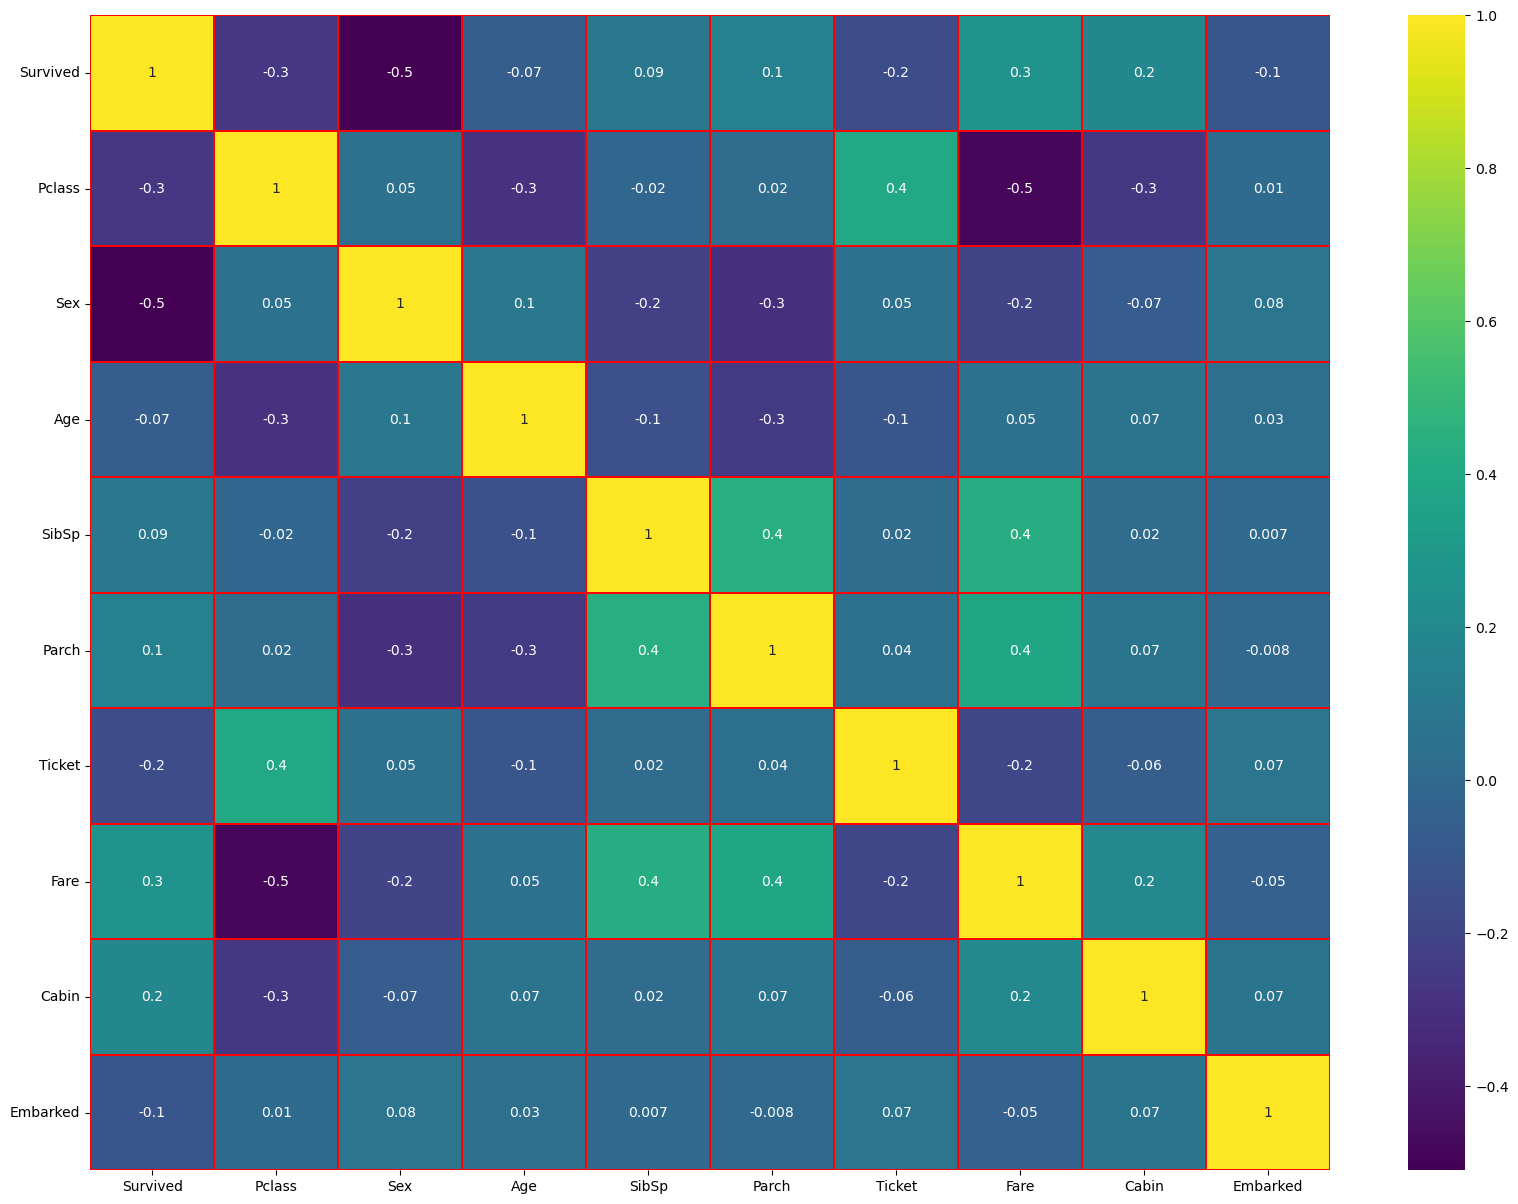

In [57]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(),linewidth=0.1,fmt='.1g',linecolor="Red", annot = True,cmap="viridis")
plt.yticks(rotation =0);
plt.show()

Almost all of them have positive relations with each other.

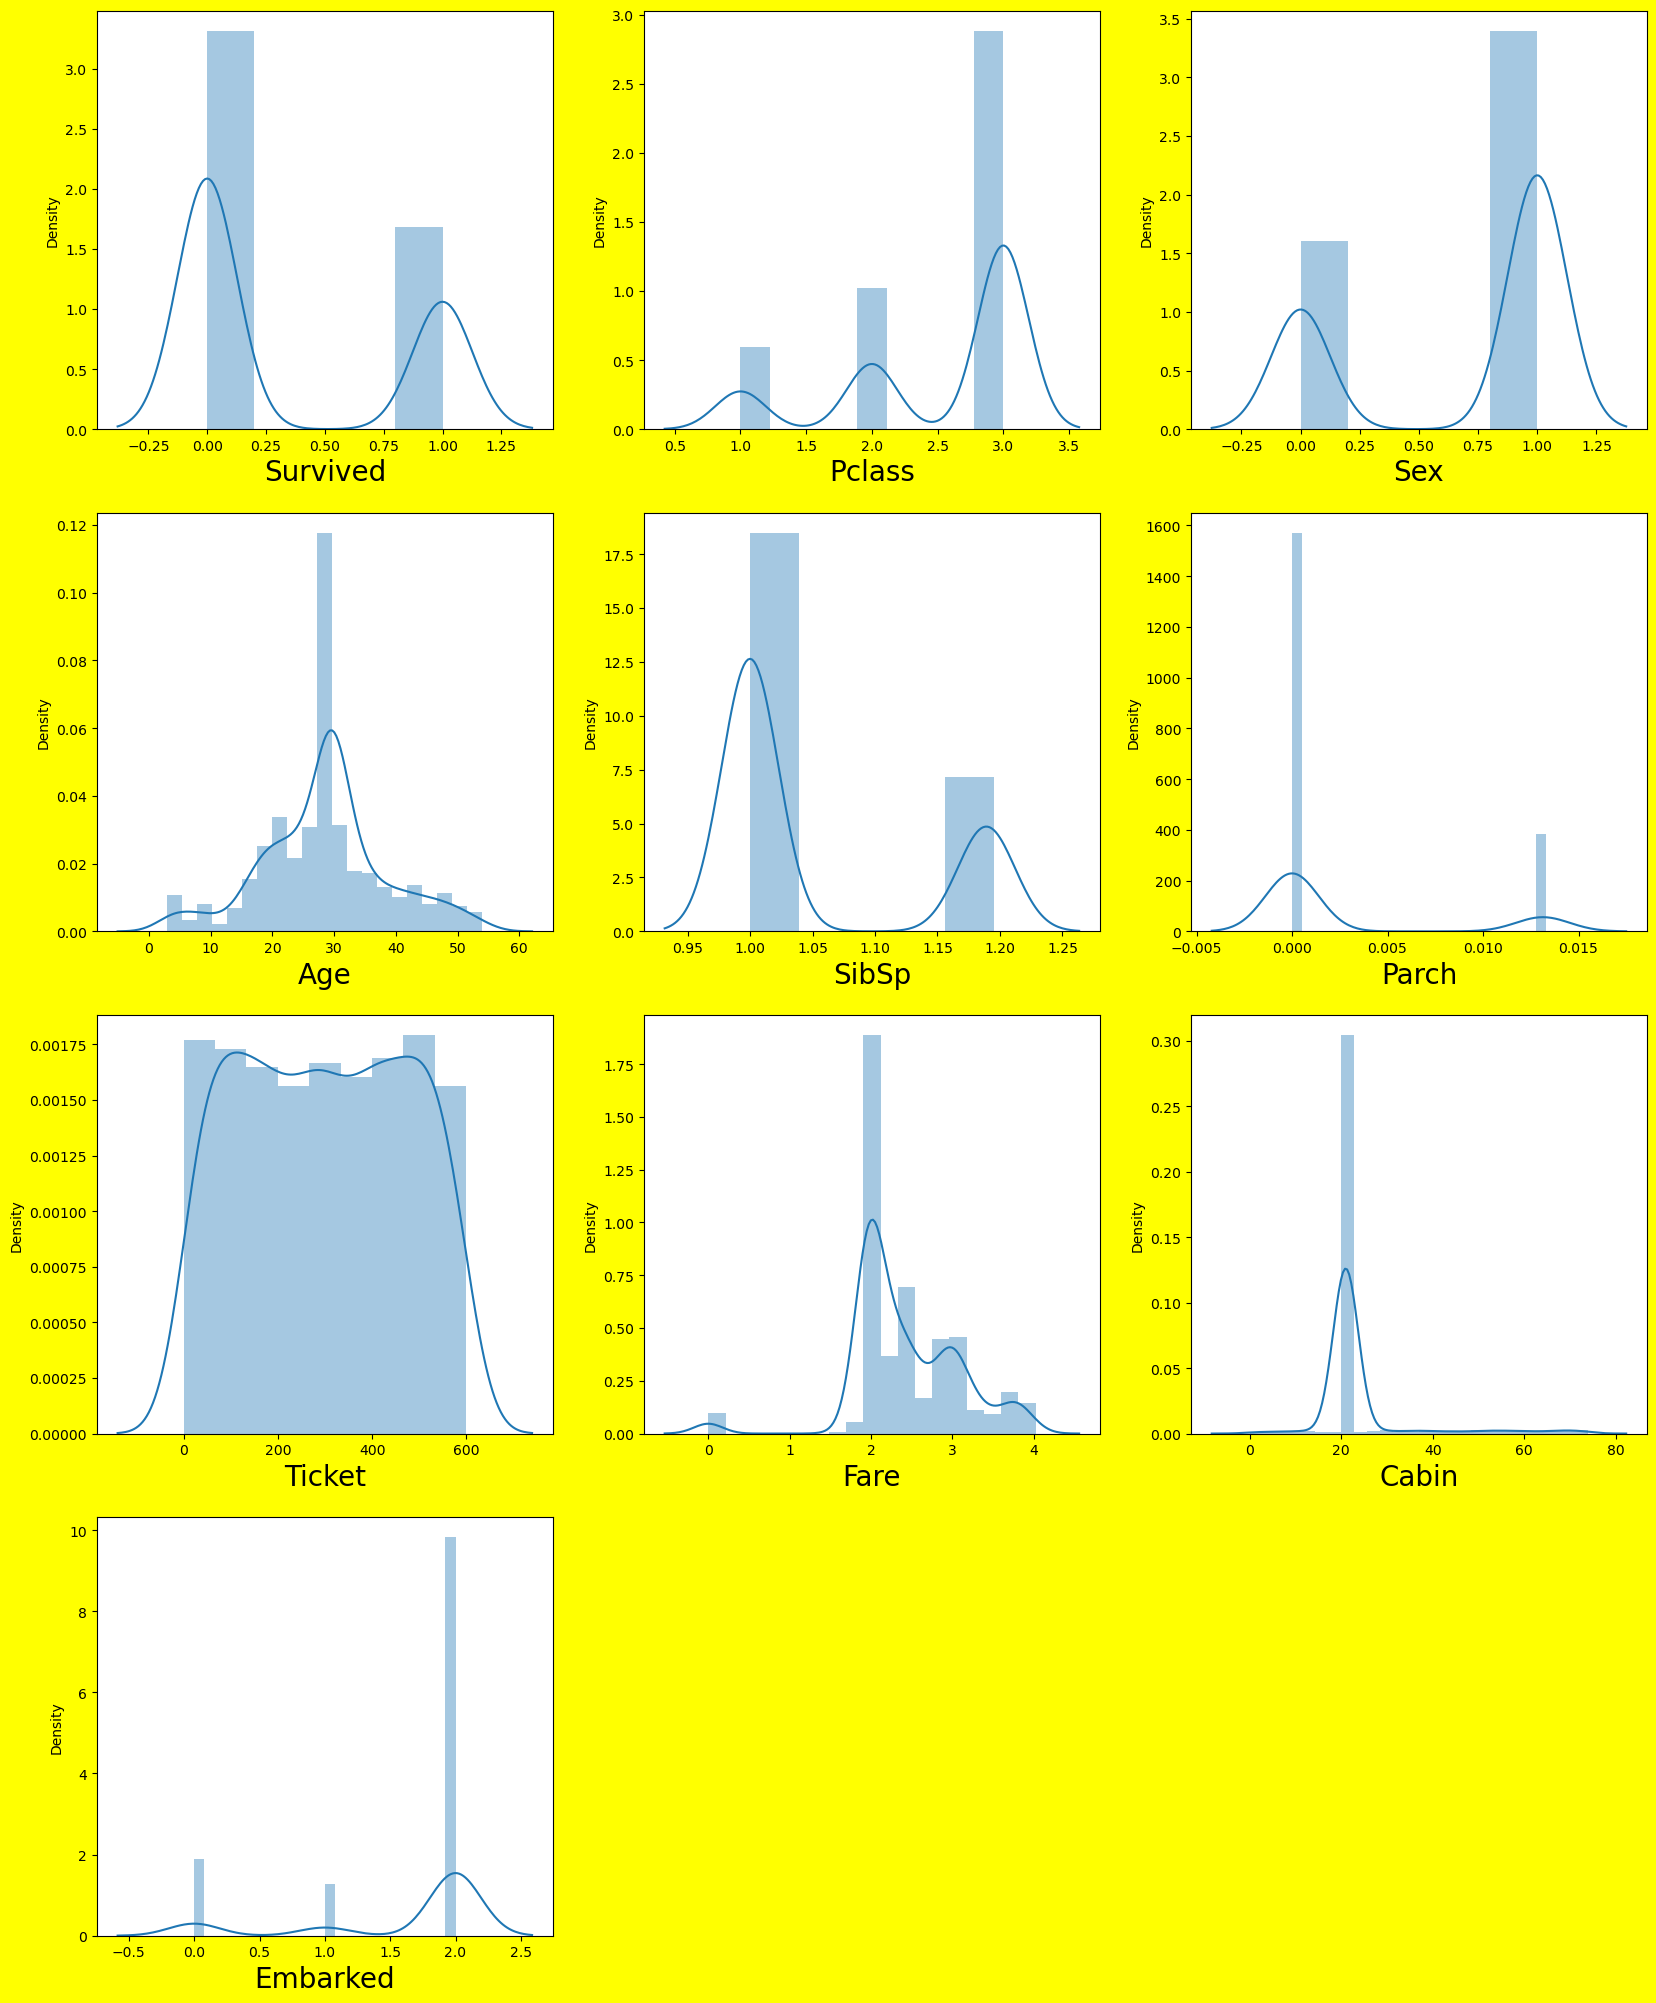

In [58]:
plt.figure(figsize=(20, 25), facecolor='yellow')
plotnumber = 1

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    if plotnumber <= 13:
        ax = plt.subplot(4, 3, plotnumber) 
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    
    plotnumber += 1

plt.show()

The data look normal now.
Checking relationships with Label.


In [59]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

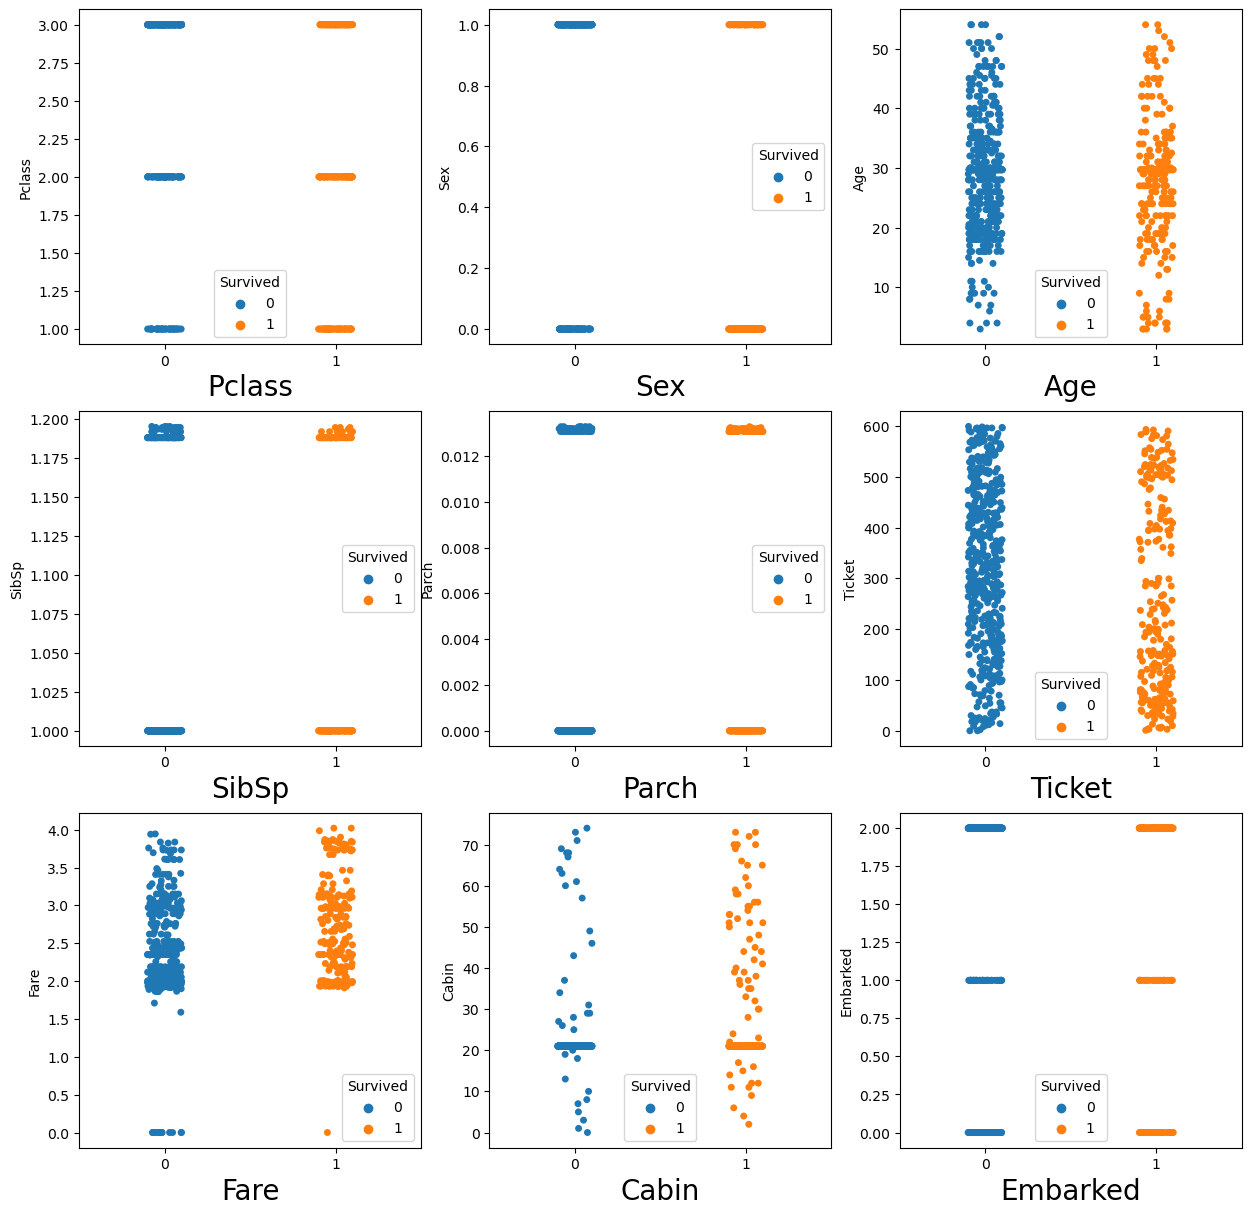

In [60]:
#visualizing the relationship between our independent variables and the categories.

#let's see how features are related to class
plt.figure(figsize=(15,20))
plotnumber = 1

for column in X:
    if plotnumber<=13:         
        ax = plt.subplot (4,3,plotnumber) 
        sns.stripplot(x=y,y=X[column],hue=y)
        plt.xlabel(column, fontsize=20)
    
    plotnumber+=1
plt.show()

Now we will be checking multicollinearity in the dependent variables. Before that, we will scale the data.

In [61]:
scalar = StandardScaler()

X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 0.68520807,  0.68660656, -0.64525336, ..., -0.73517622,
        -0.25230461,  0.53579727],
       [ 0.68520807, -1.45643816, -0.24670801, ..., -0.64755728,
        -0.25230461,  0.53579727],
       [-2.10595021, -1.45643816,  0.65001903, ...,  2.00529347,
         0.42864799,  0.53579727],
       ...,
       [ 0.68520807, -1.45643816,  0.12185853, ...,  0.65798359,
        -0.25230461,  0.53579727],
       [-2.10595021,  0.68660656, -0.24670801, ...,  1.02615093,
         0.81776376, -2.21373889],
       [ 0.68520807,  0.68660656,  0.35111002, ..., -0.66978   ,
        -0.25230461, -0.83897081]])

This is how our data looks now after scaling. Now we will check for multicollinearity using VIF(Variance Inflation factor)

In [62]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor (X_scaled, i) for i in range(X_scaled.shape[1])] 
vif["Features"] = X.columns

vif

,vif,Features
0,1.771666,Pclass
1,1.130949,Sex
2,1.181571,Age
3,1.432394,SibSp
4,1.495816,Parch
5,1.197792,Ticket
6,1.908147,Fare
7,1.098409,Cabin
8,1.023957,Embarked


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [64]:
y.value_counts()

0    478
1    243
Name: Survived, dtype: int64

Here it looks like there is data imbalanced but we know that in context of  predicting survival on the Titanic, where a significant number of people did not survive, it's not necessary to deal with the imbalance as a problem.

In [70]:
#Finding the best random state
maxAccu = 0
maxRS =0
for i in range(1, 300):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score (y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is ", maxAccu, "at random_state", maxRS)

Best accuracy is  0.8894009216589862 at random_state 188


In [71]:
x_train,x_test,y_train, y_test = train_test_split(X_scaled, y, test_size= 0.3, random_state = maxRS)

Results for LogisticRegression:
Accuracy:  0.847926267281106
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       147
           1       0.78      0.73      0.76        70

    accuracy                           0.85       217
   macro avg       0.83      0.82      0.82       217
weighted avg       0.85      0.85      0.85       217

Confusion Matrix:
 [[133  14]
 [ 19  51]]
Cross-validation scores: [0.75172414 0.77777778 0.75       0.79166667 0.80555556]
Mean Cross-validation score: 0.7753448275862068
Difference between Accuracy and cross-validation score is 7.258143969489916


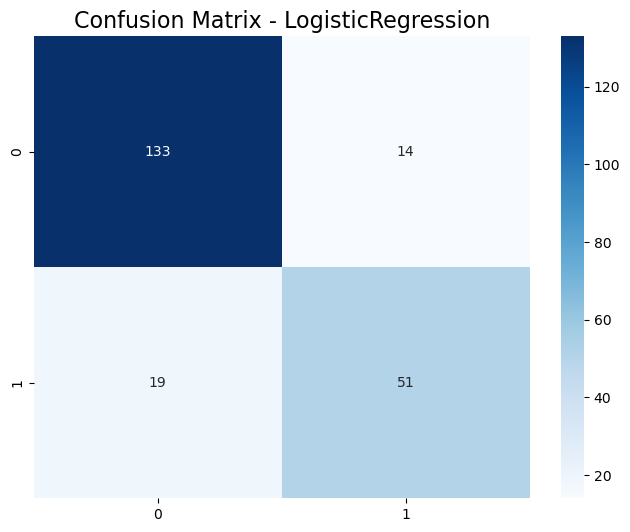



Results for RandomForestClassifier:
Accuracy:  0.880184331797235
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.91       147
           1       0.87      0.74      0.80        70

    accuracy                           0.88       217
   macro avg       0.88      0.84      0.86       217
weighted avg       0.88      0.88      0.88       217

Confusion Matrix:
 [[139   8]
 [ 18  52]]
Cross-validation scores: [0.77241379 0.76388889 0.86805556 0.82638889 0.875     ]
Mean Cross-validation score: 0.8211494252873563
Difference between Accuracy and cross-validation score is 5.903490650987864


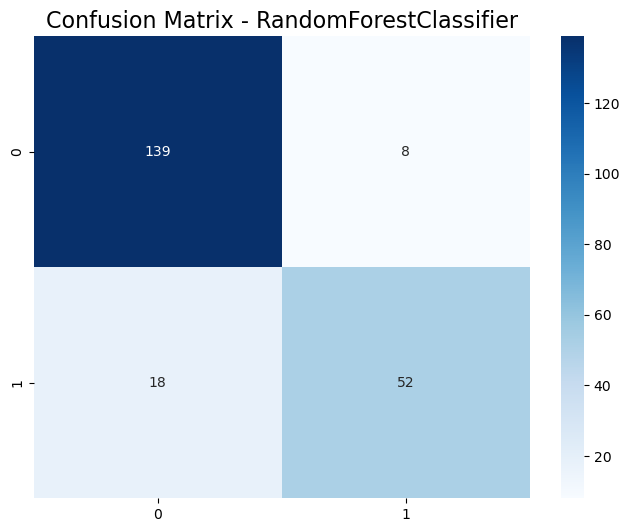



Results for DecisionTreeClassifier:
Accuracy:  0.815668202764977
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       147
           1       0.72      0.70      0.71        70

    accuracy                           0.82       217
   macro avg       0.79      0.79      0.79       217
weighted avg       0.81      0.82      0.81       217

Confusion Matrix:
 [[128  19]
 [ 21  49]]
Cross-validation scores: [0.71724138 0.6875     0.81944444 0.79861111 0.82638889]
Mean Cross-validation score: 0.7698371647509579
Difference between Accuracy and cross-validation score is 4.583103801401911


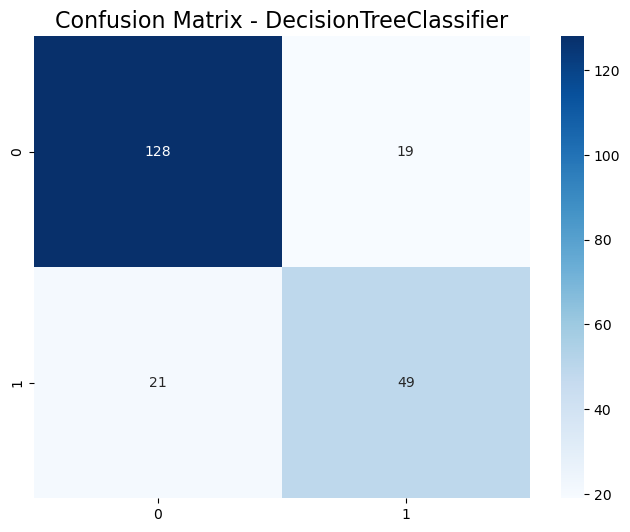



Results for SVC:
Accuracy:  0.8525345622119815
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       147
           1       0.78      0.76      0.77        70

    accuracy                           0.85       217
   macro avg       0.83      0.83      0.83       217
weighted avg       0.85      0.85      0.85       217

Confusion Matrix:
 [[132  15]
 [ 17  53]]
Cross-validation scores: [0.64827586 0.66666667 0.65972222 0.65972222 0.67361111]
Mean Cross-validation score: 0.6615996168582375
Difference between Accuracy and cross-validation score is 19.0934945353744


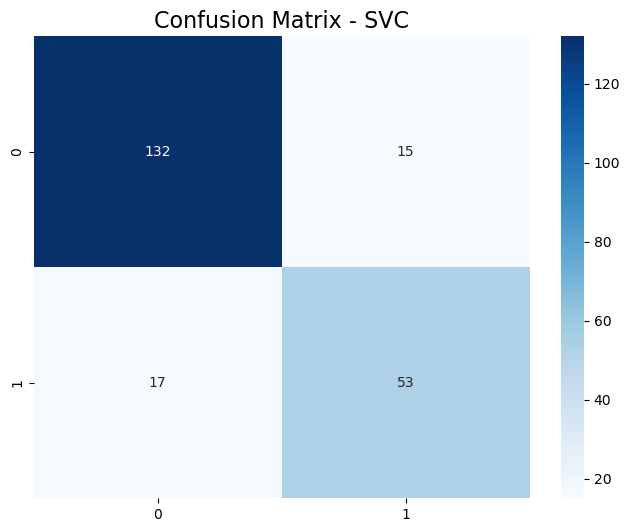



Results for GradientBoostingClassifier:
Accuracy:  0.880184331797235
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       147
           1       0.89      0.71      0.79        70

    accuracy                           0.88       217
   macro avg       0.88      0.84      0.85       217
weighted avg       0.88      0.88      0.88       217

Confusion Matrix:
 [[141   6]
 [ 20  50]]
Cross-validation scores: [0.79310345 0.78472222 0.85416667 0.79166667 0.86111111]
Mean Cross-validation score: 0.8169540229885058
Difference between Accuracy and cross-validation score is 6.323030880872915


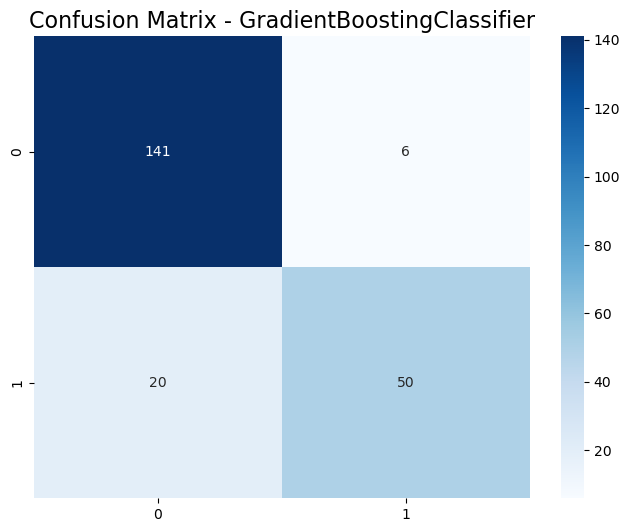



Results for AdaBoostClassifier:
Accuracy:  0.847926267281106
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       147
           1       0.79      0.71      0.75        70

    accuracy                           0.85       217
   macro avg       0.83      0.81      0.82       217
weighted avg       0.85      0.85      0.85       217

Confusion Matrix:
 [[134  13]
 [ 20  50]]
Cross-validation scores: [0.75172414 0.81944444 0.80555556 0.83333333 0.86111111]
Mean Cross-validation score: 0.8142337164750959
Difference between Accuracy and cross-validation score is 3.369255080601008


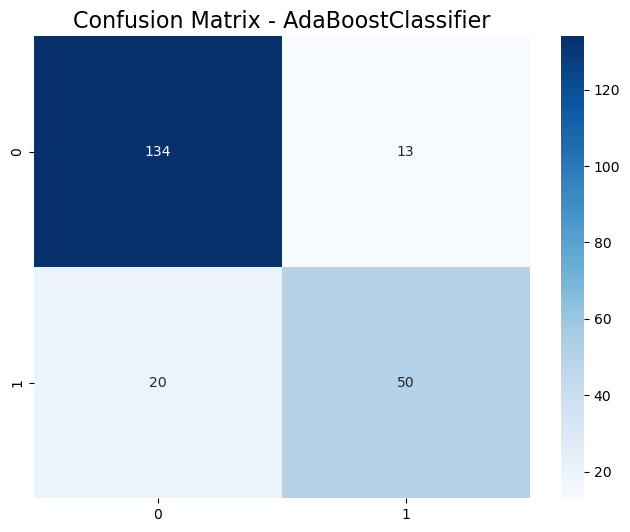



Results for ExtraTreesClassifier:
Accuracy:  0.8663594470046083
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       147
           1       0.81      0.77      0.79        70

    accuracy                           0.87       217
   macro avg       0.85      0.84      0.85       217
weighted avg       0.87      0.87      0.87       217

Confusion Matrix:
 [[134  13]
 [ 16  54]]
Cross-validation scores: [0.76551724 0.77083333 0.80555556 0.80555556 0.84027778]
Mean Cross-validation score: 0.7975478927203066
Difference between Accuracy and cross-validation score is 6.881155428430175


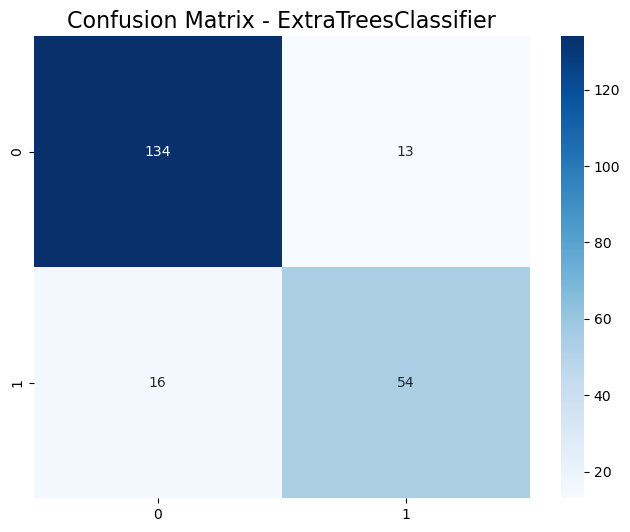

In [84]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Cross-validation
    score = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    
    # Printing results
    print(f"Results for {model_name}:")
    print('Accuracy: ', accuracy)
    print('Classification Report:\n', classification_rep)
    print('Confusion Matrix:\n', conf_matrix)
    
    # Cross-validating scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between Accuracy and cross-validation score is", (accuracy - score.mean()) * 100)
    
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}", fontsize=16)
    plt.show()
    
    print("\n" + "="*40 + "\n")


AdaBoostClassifier is our best model.

In [88]:
#hyper parameter tunning
#AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'base_estimator': [None, DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
}

In [89]:
GCV=GridSearchCV(AdaBoostClassifier(), param, cv = 5)

In [90]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [None,
                                            DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [91]:
GCV.best_params_

{'base_estimator': None, 'learning_rate': 0.1, 'n_estimators': 100}

In [92]:
Final_model = AdaBoostClassifier(learning_rate=0.1, n_estimators = 100)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test) 
acc = accuracy_score(y_test, pred) 
print (acc*100)

86.17511520737328


In [93]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [94]:
# thresholds [0] means no instances predicted (It should be read from 0 - max)
print ('Threshold =', thresholds)
print ('True Positive rate',tpr)
print ('False Positive rate ', fpr)

Threshold = [inf  1.  0.]
True Positive rate [0.         0.77142857 1.        ]
False Positive rate  [0.         0.08843537 1.        ]


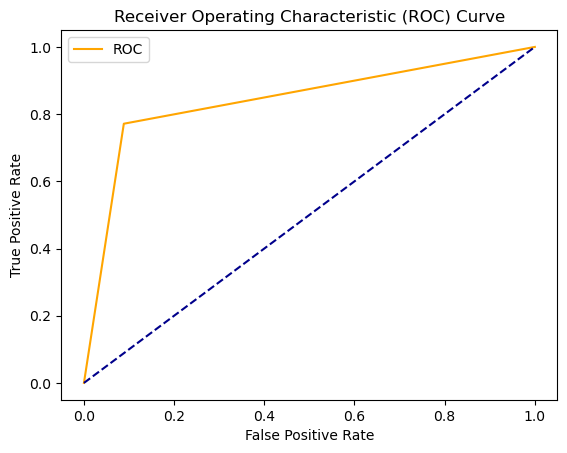

In [95]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle='--' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [96]:
# how much area AUC is covering
auc_score = roc_auc_score(y_test,y_pred)
auc_score

0.8414965986394558

In [97]:
#Saving the model
import joblib
joblib.dump(Final_model, "Titanic_Survival_Analysis.pkl")

['Titanic_Survival_Analysis.pkl']

In [99]:
# predictions
model=joblib.load("Titanic_Survival_Analysis.pkl")

prediction = model.predict(x_test)
prediction

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1],
      dtype=int64)